<h1 style="text-align:center">Deep Learning   </h1>
<h1 style="text-align:center"> Lab Session 2 - 3 Hours </h1>
<h1 style="text-align:center"> Convolutional Neural Network (CNN) for Handwritten Digits Recognition</h1>

<b> Student 1:</b> # Gaballo Alessandro
<b> Student 2:</b> # Wacker Jonas
 
 
The aim of this session is to practice with Convolutional Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 


Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an pdf document using print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by May 29th 2017.

Send you pdf file to benoit.huet@eurecom.fr and olfa.ben-ahmed@eurecom.fr using **[DeepLearning_lab2]** as Subject of your email.

# Introduction

In the last Lab Session, you built a Multilayer Perceptron for recognizing hand-written digits from the MNIST data-set. The best achieved accuracy on testing data was about 97%.  Can  you do better than these results using a deep CNN ?
In this Lab Session, you will build, train and optimize in TensorFlow one of the early Convolutional Neural Networks:  **LeNet-5** to go to  more than 99% of accuracy. 






# Load MNIST Data in TensorFlow
Run the cell above to load the MNIST data that comes  with TensorFlow. You will use this data in **Section 1** and **Section 2**.

In [14]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Image Shape: (784,)
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


# Section 1 : My First Model in TensorFlow

Before starting with CNN, let's train and test in TensorFlow the example :
**y=softmax(Wx+b)** seen in the DeepLearing course last week. 

This model reaches an accuracy of about 92 %.
You will also learn how to launch the tensorBoard https://www.tensorflow.org/get_started/summaries_and_tensorboard to  visualize the computation graph, statistics and learning curves. 

<b> Part 1 </b> : Read carefully the code in the cell below. Run it to perform training. 

In [2]:
from __future__ import print_function
import tensorflow as tf


#STEP 1

# Parameters
learning_rate = 0.01
training_epochs = 100
batch_size = 128
display_step = 1
logs_path = 'log_files/'  # useful for tensorboard

# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


#STEP 2 


# Launch the graph for training
with tf.Session() as sess:
    sess.run(init)
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))




Epoch:  01   =====> Loss= 1.288867864
Epoch:  02   =====> Loss= 0.733035091
Epoch:  03   =====> Loss= 0.600288722
Epoch:  04   =====> Loss= 0.536401708
Epoch:  05   =====> Loss= 0.498107379
Epoch:  06   =====> Loss= 0.470978013
Epoch:  07   =====> Loss= 0.451188578
Epoch:  08   =====> Loss= 0.436120835
Epoch:  09   =====> Loss= 0.423948135
Epoch:  10   =====> Loss= 0.413557586
Epoch:  11   =====> Loss= 0.404378581
Epoch:  12   =====> Loss= 0.396322768
Epoch:  13   =====> Loss= 0.389684460
Epoch:  14   =====> Loss= 0.384512511
Epoch:  15   =====> Loss= 0.378820851
Epoch:  16   =====> Loss= 0.375883290
Epoch:  17   =====> Loss= 0.369544002
Epoch:  18   =====> Loss= 0.367543612
Epoch:  19   =====> Loss= 0.362105399
Epoch:  20   =====> Loss= 0.359983072
Epoch:  21   =====> Loss= 0.355285205
Epoch:  22   =====> Loss= 0.354059463
Epoch:  23   =====> Loss= 0.351495637
Epoch:  24   =====> Loss= 0.349211966
Epoch:  25   =====> Loss= 0.346712716
Epoch:  26   =====> Loss= 0.344755582
Epoch:  27  

<b> Part 2  </b>: Using Tensorboard, we can  now visualize the created graph, giving you an overview of your architecture and how all of the major components  are connected. You can also see and analyse the learning curves. 

To launch tensorBoard: 
- Go to the **TP2** folder, 
- Open a Terminal and run the command line **"tensorboard --logdir log_files/"**, it will generate an http link ,ex http://666.6.6.6:6006,
- Copy this  link into your web browser 


Enjoy It !! 


# Section 2 : The 99% MNIST Challenge !

<b> Part 1 </b> : LeNet5 implementation

One you are now familar with **tensorFlow** and **tensorBoard**, you are in this section to build, train and test the baseline [LeNet-5](http://yann.lecun.com/exdb/lenet/)  model for the MNIST digits recognition problem.  

In more advanced step you will make some optimizations to get more than 99% of accuracy. The best model can get to over 99.7% accuracy! 

For more information, have a look at this list of results : http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html


<img src="lenet.png",width="800" height="600" align="center">
<center><span>Figure 1: Lenet 5 </span></center>





The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

--------------------------
**Layer 1: Convolutional.** The output shape should be 28x28x6 **Activation.** sigmoid **Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16. **Activation.** sigmoid **Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.  You may need to use **flatten*  from tensorflow.contrib.layers import flatten

**Layer 3: Fully Connected.** This should have 120 outputs. **Activation.** sigmoid

**Layer 4: Fully Connected.** This should have 84 outputs. **Activation.** sigmoid

**Layer 5: Fully Connected.** This should have 10 outputs. **Activation.** softmax


<b> Question 2.1.1 </b>  Implement the Neural Network architecture described above.
For that, your will use classes and functions from  https://www.tensorflow.org/api_docs/python/tf/nn. 

We give you some helper functions for weigths and bias initilization. Also you can refer to section 1. 


In [49]:
#Helper functions  for weigths and bias initilization 

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [50]:
def LeNet5_Model(data, activation='sigmoid'):    
    # --- level 1 --- #
    #A 4-D tensor of shape [filter_height, filter_width, in_channels, out_channels]
    # in_channels depens on the input img, out_channels is the number of desired filters
    filters_conv_1 = weight_variable([5, 5, 1, 6])
    window_pool_1 = [1, 2, 2, 1]
    strides_conv_1 = [1, 1, 1, 1]
    strides_pool_1 = [1, 2, 2, 1]
    #the bias term is applied to each feature map
    bias_layer_1 = bias_variable([6])
    #we use SAME as padding because we want to keep the size of the original img 28x28,
    #NOT 32x32 as expected
    conv_layer_1 = tf.nn.conv2d(data, filters_conv_1, strides_conv_1, "SAME")
    if activation=='relu':
        hidden_layer_1 = tf.nn.relu(conv_layer_1 + bias_layer_1)
    else:
        hidden_layer_1 = tf.nn.sigmoid(conv_layer_1 + bias_layer_1)
    pool_layer_1 = tf.nn.max_pool(hidden_layer_1, window_pool_1, strides_pool_1, "VALID")
    
    # --- end level 1 --- #
    # --- level 2 --- #
    filters_conv_2 = weight_variable([5, 5, 6, 16])
    bias_layer_2 = bias_variable([16])
    strides_conv_2 = [1, 1, 1, 1]
    strides_pool_2 = [1, 2, 2, 1]
    window_pool_2 = [1, 2, 2, 1]
    strides_pool_2 = [1, 2, 2, 1]
    
    conv_layer_2 = tf.nn.conv2d(pool_layer_1, filters_conv_2, strides_conv_2, "VALID")
    if activation=='relu':
        hidden_layer_2 = tf.nn.relu(conv_layer_2 + bias_layer_2)
    else:
        hidden_layer_2 = tf.nn.sigmoid(conv_layer_2 + bias_layer_2)
    pool_layer_2 = tf.nn.max_pool(hidden_layer_2, window_pool_2, strides_pool_2, "VALID")
    flatten_l2 = tf.contrib.layers.flatten(pool_layer_2)
    # --- end level 2 --- #

    # --- level 3 --- #
    l3_weights = weight_variable([16*5*5, 120])
    l3_bias = bias_variable([120])
    if activation=='relu':
        hidden_layer_3 = tf.nn.relu(tf.matmul(flatten_l2, l3_weights) + l3_bias)
    else:
        hidden_layer_3 = tf.nn.sigmoid(tf.matmul(flatten_l2, l3_weights) + l3_bias)     
    # --- end level 3 --- #
    
    # --- dropout layer --- #
    drop_layer_1 = tf.nn.dropout(hidden_layer_3, keep_prob)
    # --- end dropout layer --- #
    
    # --- level 4 --- #
    l4_weights = weight_variable([120,84])
    l4_bias = bias_variable([84])
    if activation=='relu':
        hidden_layer_4 = tf.nn.relu(tf.matmul(drop_layer_1, l4_weights) + l4_bias) 
    else:
        hidden_layer_4 = tf.nn.sigmoid(tf.matmul(drop_layer_1, l4_weights) + l4_bias) 
    # --- end level 4 --- #
    
    # --- dropout layer --- #
    drop_layer_2 = tf.nn.dropout(hidden_layer_4, keep_prob)
    # --- end dropout layer --- #
    
    # --- level 5 --- #
    l5_weights = weight_variable([84, 10])
    l5_bias = bias_variable([10])
    output = tf.nn.softmax(tf.matmul(drop_layer_2, l5_weights) + l5_bias)
    # output = tf.matmul(hidden_layer_4, l5_weights) + l5_bias
    # --- end level 5 --- #
    return output


<b> Question 2.1.2. </b>  Calculate the number of parameters of this model 

In [5]:
layer_1 = 6*5*5 + 6
layer_2 = 16*5*5 + 16
layer_3 = 16*5*5*120 + 120
layer_4 = 120*84 + 84
layer_5 = 84*10 + 10

total = layer_1 + layer_2 + layer_3 + layer_4 + layer_5
print("Total number of parameters : %d" %total)

Total number of parameters : 59706


<b> Question 2.1.3. </b>  Start the training with the parameters cited below:

     Learning rate = 0.1
     Loss function : Cross entropy
     Optimisateur: SGD
     Number of training iterations = 10000
     The batch size = 128

In [51]:
# Training parameters 
learning_rate = 0.1
iterations = 100
batch_size = 128
logs_path = 'log_files_leNet5/'
#Your implementation goes here
# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 28, 28, 1], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# dropout
keep_prob = tf.placeholder(tf.float32)

<b> Question 2.1.4. </b>  Implement the evaluation function for accuracy computation 

In [52]:
def evaluate(model, y):
    #your implementation goes here
    correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

<b> Question 2.1.5. </b>  Implement training pipeline and run the training data through it to train the model.

- Before each epoch, shuffle the training set. 
- Print the loss per mini batch and the training/validation accuracy per epoch. (Display results every 100 epochs)
- Save the model after training
- Print after training the final testing accuracy 



In [53]:
# Initializing the variables
def train(out_dir, optimizer='GradientDescent', display_step=1, activation='sigmoid', kp=1.0):
    
    # Initializing the session
    optimizers = {'GradientDescent': tf.train.GradientDescentOptimizer,
                 'AdamOptimizer': tf.train.AdamOptimizer}
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
    # Model
        pred = LeNet5_Model(x, activation)
    with tf.name_scope('Loss'):
    # Minimize error using cross entropy
        #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
    with tf.name_scope('SGD'):
    # Gradient Descent
        # optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
        optimizer = optimizers[optimizer](learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
    # Accuracy
        acc = evaluate(pred, y)
    
    
    saver = tf.train.Saver()
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()

    x_val, y_val = mnist.validation.images.reshape(-1, 28, 28, 1), mnist.validation.labels
    
    with tf.Session() as sess:
        sess.run(init)
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        print ("Start Training!")
        for epoch in range(iterations):
            avg_cost = 0.
            num_batch = int(mnist.train.num_examples/batch_size)
            for i in range(num_batch):
                # shuffle = True is the default option, the shuffle is done at each epoch
                batch_xs, batch_ys = mnist.train.next_batch(batch_size, shuffle=True)
                batch_xs = batch_xs.reshape(-1, 28, 28, 1)

                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                         feed_dict={x: batch_xs, y: batch_ys, keep_prob: kp})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * num_batch + i)
                avg_cost += c / num_batch
                    
            if (epoch+1) % display_step == 0:
                accuracy = acc.eval({x: x_val, y: y_val, keep_prob: 1.0})
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Validation accuracy=", 
                                              "{:.9f}".format(accuracy))
                
                #if accuracy > 0.99:
                    #print("[EPOCH {0}] Reached validation accuracy > 99% , stopping training".format(epoch + 1))
                    #break

        x_test = mnist.test.images.reshape(-1, 28, 28, 1)
        y_test = mnist.test.labels
        print("Accuracy:", acc.eval({x: x_test, y: y_test, keep_prob: 1.0}))
        saver.save(sess, out_dir)
    print("Optimization Finished!")
    print("Training Finished!")
    
   #Your implementation for testing accuracy after training goes here

In [ ]:
# trainining with first configuration
train('./models/lenet5_sgd')

Start Training!
Epoch:  01   =====> Loss= 2.306220544
Epoch:  01   =====> Validation accuracy= 0.112599999
Epoch:  02   =====> Loss= 2.305765380
Epoch:  02   =====> Validation accuracy= 0.112599999
Epoch:  03   =====> Loss= 2.304829811
Epoch:  03   =====> Validation accuracy= 0.109999999
Epoch:  04   =====> Loss= 2.304256634
Epoch:  04   =====> Validation accuracy= 0.097599998
Epoch:  05   =====> Loss= 2.303919562
Epoch:  05   =====> Validation accuracy= 0.112599999
Epoch:  06   =====> Loss= 2.303605696
Epoch:  06   =====> Validation accuracy= 0.098600000
Epoch:  07   =====> Loss= 2.302925382
Epoch:  07   =====> Validation accuracy= 0.183400005
Epoch:  08   =====> Loss= 2.302268229
Epoch:  08   =====> Validation accuracy= 0.097599998
Epoch:  09   =====> Loss= 2.300304821
Epoch:  09   =====> Validation accuracy= 0.095799997
Epoch:  10   =====> Loss= 2.298719998
Epoch:  10   =====> Validation accuracy= 0.097599998
Epoch:  11   =====> Loss= 2.291144160
Epoch:  11   =====> Validation accur

In [54]:
# training with AdamOptimizer
import time
init_time = time.time()
train('./models/lenet5_sgd_relu', activation='relu')
print('Training duration:', time.time() - init_time)

Start Training!


InvalidArgumentError: Shape [-1,28,28,1] has negative dimensions
	 [[Node: InputData = Placeholder[dtype=DT_FLOAT, shape=[?,28,28,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'InputData', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-18b67fb40993>", line 8, in <module>
    x = tf.placeholder(tf.float32, [None, 28, 28, 1], name='InputData')
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1522, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2021, in _placeholder
    name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2340, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1232, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,28,28,1] has negative dimensions
	 [[Node: InputData = Placeholder[dtype=DT_FLOAT, shape=[?,28,28,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
# training with AdamOptimizer
import time
init_time = time.time()
train('./models/lenet5_adam_relu', optimizer='AdamOptimizer', activation='relu')
print('Training duration:', time.time() - init_time)

<b> Question 2.1.6 </b> : Use tensorBoard to visualise and save the LeNet5 Graph and all learning curves. 
Save all obtained figures in the folder **"TP2/MNIST_99_Challenge_Figures"**

In [ ]:
#  insert your obtained figure here 

In [ ]:
# your answer goes here

<b> Part 2 </b> : LeNET 5 Optimization


<b> Question 2.2.1 </b>  Change the sigmoid function with a Relu :

- Retrain your network with SGD and AdamOptimizer and then fill the table above  :


| Optimizer            |  Gradient Descent         |AdamOptimizer |
| -------------        |: -------------: | ---------:   
| Validation Accuracy  |         |    |      
| Testing Accuracy     |           |    |       
| Training Time        |           |        |  |  


- Try with different learning rates for each Optimizer (0.0001 and 0.001 ) and different Batch sizes (50 and 128) for 20000 Epochs. 

- For each optimizer, plot (on the same curve) the **testing accuracies** function to **(learning rate, batch size)** 



- Did you reach the 99% accuracy ? What are the optimal parametres that gave you the best results? 








In [21]:
# your answer goes here
iterations = 100
for lr in [0.0001, 0.001]:
    learning_rate = lr
    print('Learning rate:', lr)
    for bs in [50, 128]:
        batch_size = bs
        print('Batch size:', bs)
        train('./models/lenet5_sgd_relu_' + str(bs) + '_' + str(lr), activation='relu')
        train('./models/lenet5_adam_relu_' + str(bs) + '_' + str(lr), optimizer='AdamOptimizer', activation='relu')

Learning rate: 0.0001
Batch size: 50
Start Training!
Epoch:  01   =====> Loss= 2.324329930
Epoch:  01   =====> Validation accuracy= 0.130400002
Epoch:  02   =====> Loss= 2.308605538
Epoch:  02   =====> Validation accuracy= 0.155800000
Epoch:  03   =====> Loss= 2.297603052
Epoch:  03   =====> Validation accuracy= 0.178599998
Epoch:  04   =====> Loss= 2.288610613
Epoch:  04   =====> Validation accuracy= 0.190200001
Epoch:  05   =====> Loss= 2.280258192
Epoch:  05   =====> Validation accuracy= 0.206599995
Epoch:  06   =====> Loss= 2.271804899
Epoch:  06   =====> Validation accuracy= 0.224399999
Epoch:  07   =====> Loss= 2.262851090
Epoch:  07   =====> Validation accuracy= 0.246600002
Epoch:  08   =====> Loss= 2.253006443
Epoch:  08   =====> Validation accuracy= 0.273000002
Epoch:  09   =====> Loss= 2.241876211
Epoch:  09   =====> Validation accuracy= 0.312999994
Epoch:  10   =====> Loss= 2.228999188
Epoch:  10   =====> Validation accuracy= 0.356200010
Epoch:  11   =====> Loss= 2.213786695

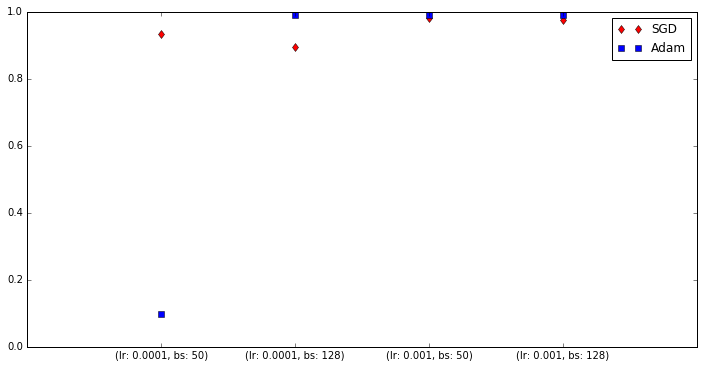

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
x = (1, 2, 3, 4)
x_labels = ['', '(lr: 0.0001, bs: 50)', '(lr: 0.0001, bs: 128)', '(lr: 0.001, bs: 50)', '(lr: 0.001, bs: 128)', '']
t_sgd = [0.9337, 0.8948, 0.9831, 0.9747]
t_adam = [0.098, 0.9899, 0.9897, 0.9896]

# red dashes, blue squares and green triangles
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, t_sgd, 'rd')
ax.plot(x, t_adam, 'bs')
width = 0.4
ax.set_xlim([0, 5])
ax.set_xticklabels(x_labels)
ax.legend(['SGD', 'Adam'])
plt.show()

<strong>Answer:</strong> In general, the Adam optimizer seems to achieve better results than SGD despite some stability issues (training loss can turn to NaN). In general, the Adam optimizer achieved 99% validation accuracy with the following parameters: (lr: 0.001, bs: 128) after 7 epochs, (lr: 0.001, bs: 50) after 11 epochs, (lr: 0.0001, bs: 128) after 70 epochs. We stopped the optimization process whenever we achieved 99% accuracy in order to speed up the whole evaluation. Moreover, the accuracies were not always stable. We therefore secured good results. Looking at the evaluation carried out, we find that the Adam Optimizer with a learning rate of 0.001 and a batch size of 128 is the best setting (fastest in achieving a 99% validation accuracy). To achieve the same result on the test data we need to run it a little longer though (test accuracy was only 0.9899 after directly stopping the script).

<b> Question 2.2.2 </b>  What about applying a dropout layer on the Fully conntected layer and then retraining the model with the best Optimizer and parameters(Learning rate and Batsh size) obtained in *Question 2.2.1*  ? (probability to keep units=0.75). For this stage ensure that the keep prob is set to 1.0 to evaluate the 
performance of the network including all nodes.

In [ ]:
# your implementaion goes here
learning_rate = 0.001
batch_size = 128
iterations = 100
train('./models/lenet5_adam_relu_drop', optimizer='AdamOptimizer', activation='relu', kp=0.75)

In [ ]:
#Your comments go here